#  Linear and Polynomial Regression

In this tutorial, we’ll discuss how to implement a simple linear regression model using the least squares approach to fit the data. After that, we’ll extend the model to a polynomial regression model in order to capture more complex signals. We’ll be using the mean squared error to measure the quality of fit for every model we generate.

## Linear Regression

### Introduction

Linear Regression:

Simple linear regression is useful for finding the relationship between two continuous variables. One is the predictor or independent variable and the other is the response or dependent variable. It looks for a statistical relationship but a not deterministic relationship. A relationship between two variables is said to be deterministic if one variable can be accurately expressed by the other. 

For example, using temperature in degree Celsius it is possible to predict Fahrenheit accurately. The statistical relationship is not accurate in determining the relationship between two variables. For example, the relationship between height and weight.

Concept:

The core idea is to obtain a line that best fits the data. The best fit line is the one for which the total prediction error (all data points) is as small as possible. Error is the distance between the point to the regression line.

Y(pred) = b0 + b1*x

The values b0 and b1 must be chosen so that they minimize the error. If sum of squared error is taken as a metric to evaluate the model, then goal to obtain a line that best reduces the error.

### Example

Loading and Plotting the Data :

Let’s start by loading the training data into the memory and plotting it as a graph to see what we’re working with. Think of train_features as x-values and train_desired_outputs as y-values. The graph below is the resulting scatter plot of all the values.

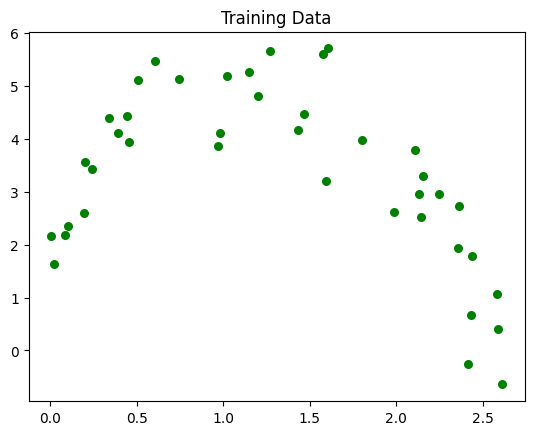

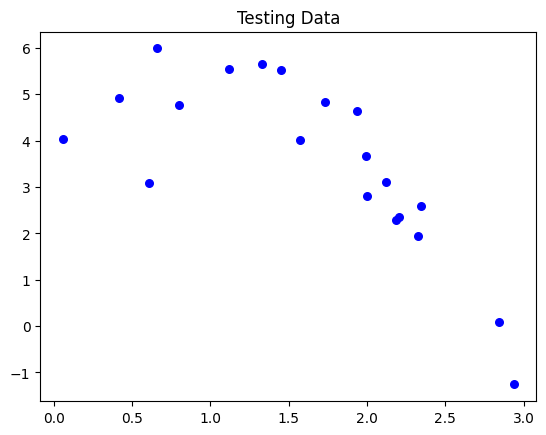

In [ ]:
"""
# Load and plot data files
"""
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Load the training data hw1xtr.dat and hw1ytr.dat into the memory
train_features = pd.read_csv('xtr.dat',  header = None) 
train_desired_outputs = pd.read_csv('ytr.dat', header = None) 

# # Plot training_data and desired_outputs
train_features_vals = train_features.values
train_desired_outputs_vals = train_desired_outputs.values
plt.scatter(train_features_vals, train_desired_outputs_vals, color = 'g', marker = 'o', s = 30)
plt.title('Training Data')
plt.show()

# Load the test data hw1xte.dat and hw1yte.dat into the memory
test_features = pd.read_csv('xte.dat',  header = None) 
test_desired_outputs = pd.read_csv('yte.dat', header = None) 

# # Plot training_data and desired_outputs
plt.scatter(test_features.values, test_desired_outputs.values, color = 'b', marker = 'o', s = 30)
plt.title('Testing Data')
plt.show()


Now it’s time to write a simple linear regression model to try fit the data. Our goal is to find a line that best resembles the underlying pattern of the training data shown in the graph. We’re going to use the least squares method to parameterize our model with the coefficients that best describe the training set before seeing how well the model generalizes to data it hasn’t seen before. Recall that the simple linear regression model is parameterized by a y-intercept and the slope of the regression line.

Training Our Linear Regression Model :

The process of finding parameters so that our model fits the training data is called ‘training’ our model. Given a design matrix X and a column vector of target outputs y, we can use the following equation to find the best intercept and slope coefficients for our linear model through least squares regression (for an in-depth view into the linear algebra concepts behind this equation,

w= (X^T. X)^-1 . X^T. Y

We first create a design matrix X which holds a column of ones (in order to estimate the y-intercept) and another column to hold the values of our explanatory variable x. Then we take the inverse of the dot product of X with its transpose, and dot product it with the dot product of the X-transpose and y (the y-values for training_desired_outputs).

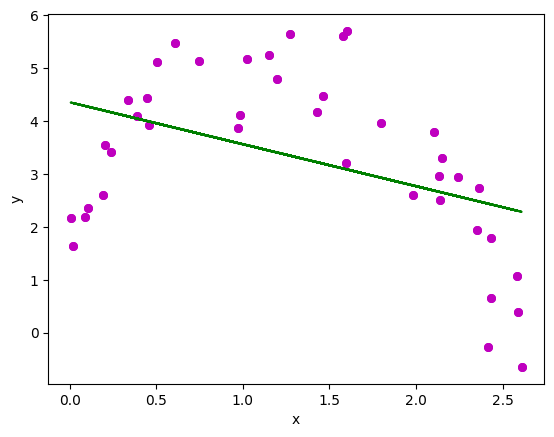

MSE on the training set:  2.1739455790492586


In [ ]:
"""
# Train linear regression model on training set
"""
train_features_vals = train_features.values
train_desired_outputs_vals = train_desired_outputs.values

N = len(train_features)
X = np.c_[np.ones(N), train_features_vals]
A = np.linalg.inv(X.T@X)
D = A@X.T
result = D@train_desired_outputs_vals

y_pred = []
def plot_regression_line(x, y, b): 
    # Plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 30) 

    # Predicted response vector 
    global y_pred
    y_pred = b[0] + b[1]*x 
    
    # Plotting the regression line 
    plt.plot(x, y_pred, color = "g") 

    # putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 

    # Function to show plot 
    plt.show() 

# Plot scatter plot
plt.scatter(train_features_vals, train_desired_outputs_vals, color = 'm', marker = 'o', s = 30)
plot_regression_line(train_features_vals, train_desired_outputs_vals, result)

# Find average error on the training set
A = np.square(y_pred - train_desired_outputs_vals)
error = np.sum(A)/N
print('MSE on the training set: ', error)



We can quantify how well our model fits the data by using the mean squared error (MSE) to calculate the average squared difference between our line and the actual data point in the training set. The MSE is calculated as follows:

Testing Our Linear Regression Model :

Now let’s see how well our model predicts on data it hasn’t seen before. We call this step the testing phase. Remember, our model is defined by the coefficients returned by :

w= (X^T. X)^-1 . X^T. Y

So the function above returns w which contains coefficients for the y-intercept and the slope. We’re going to test our model using the same values we used to train it.

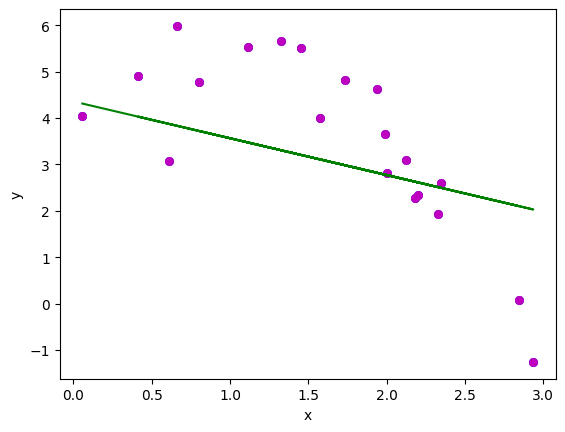

Average error on the testing set:  2.3118753456727994


In [ ]:
"""
# Test linear regression model on testing set
"""
test_features_vals = test_features.values
test_desired_outputs_vals = test_desired_outputs.values

plt.scatter(test_features_vals, test_desired_outputs, color = 'b', marker = 'o', s = 30)

y_pred_test = []
def plot_regression_line(x, y, b): 
    # Plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 30) 

    # Predicted response vector 
    global y_pred_test
    y_pred_test = b[0] + b[1]*x 
    
    # plotting the regression line 
    plt.plot(x, y_pred_test, color = "g") 

    # Putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 

    # Function to show plot 
    plt.show() 

plot_regression_line(test_features_vals, test_desired_outputs_vals, result)

# Find average error on the training set
A = np.square(y_pred_test - test_desired_outputs_vals)
error = np.sum(A)/test_features_vals.shape[0]
print('Average error on the testing set: ', error)



## Polynomial Regression

### Introduction

Polynomial Regression:
Polynomial Regression is a regression algorithm that models the relationship between a dependent(y) and independent variable(x) as nth degree polynomial.

It is also called the special case of Multiple Linear Regression in ML. Because we add some polynomial terms to the Multiple Linear regression equation to convert it into Polynomial Regression.


It is a linear model with some modification in order to increase the accuracy.The dataset used in Polynomial regression for training is of non-linear nature.
It makes use of a linear regression model to fit the complicated and non-linear functions and datasets.

Concept:

All we need to do to implement polynomial regression is to take our linear regression model and add more features. Recall the form of the linear regression model and compare it to the form of the polynomial regression model

y = b0 + b1 xi + b2 xi^2 + b3 xi^3...............................+ bm xi^m + ei (i=1,2,3.........)

You can see that we need an extra coefficient for every additional feature, denoted by x²…xᵐ. The order of the polynomial regression model depends on the number of features included in the model, so a model with m features is an mᵗʰ-degree or mᵗʰ-order polynomial regression. We’ll start with 2nd-order polynomial regression and you’ll notice that it’s quite easy to increase the complexity of your regression model (increasing model complexity isn’t always a good thing and can lead to overfitting!!!).

### Example

2nd-Order Polynomial Regression:

Since we’re including another feature into our model, we’re going to have to account for it by adding another term into our design matrix. The general form of the design matrix with m-degrees looks like this

Notice how we included a column for the x² features on the right hand side of the design matrix X. The resulting three coefficients are stored in coeffs. Let’s apply the model to our training data and print out the regression line.

Here’s how our 2nd-order polynomial regression model fit the training data:

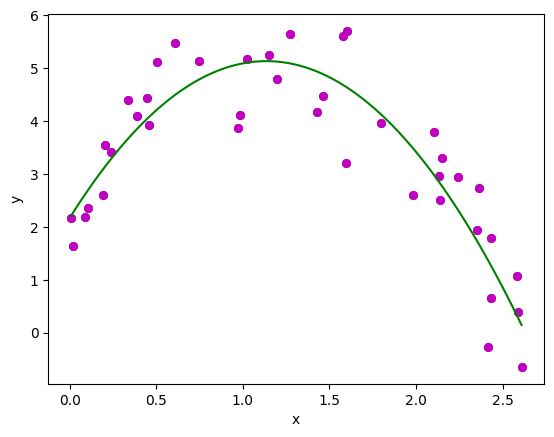

Average error on the training set:  0.48468450312715505


In [ ]:
"""
# Train 2nd-order regression model on training set
"""
train_features_vals = train_features.values
train_desired_outputs_vals = train_desired_outputs.values

# # Plot scatter plot
# plt.scatter(train_features_vals, train_desired_outputs_vals, color = 'm', marker = 'o', s = 30)

N = len(train_features)
X = np.c_[np.ones(N), train_features_vals, np.square(train_features)]
A = np.linalg.inv(X.T@X)
D = A@X.T
result = D@train_desired_outputs_vals

y_pred = []
def plot_regression_line(x, y, b): 
    # plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 30) 

    x_line = np.linspace(train_features_vals.min(), train_features_vals.max(), 100)
    global y_pred
    y_pred = b[2]*np.square(x_line) + b[1]*x_line + b[0] 
    regression_line = y_pred
    # Plotting the regression line 
    plt.plot(x_line, regression_line, color = "g") 
    # Putting labels 
    plt.xlabel('x') 
    plt.ylabel('y')     

# Plot scatter plot
plt.scatter(train_features_vals, train_desired_outputs_vals, color = 'm', marker = 'o', s = 30)
plot_regression_line(train_features_vals, train_desired_outputs_vals, result)
plt.show() 

# Find average error on the training set
A = np.square(result[2]*np.square(train_features_vals) + result[1]*train_features_vals + result[0]  - train_desired_outputs_vals)
error = np.sum(A)/N
print('Average error on the training set: ', error)

And now let’s apply our model to the testing data.

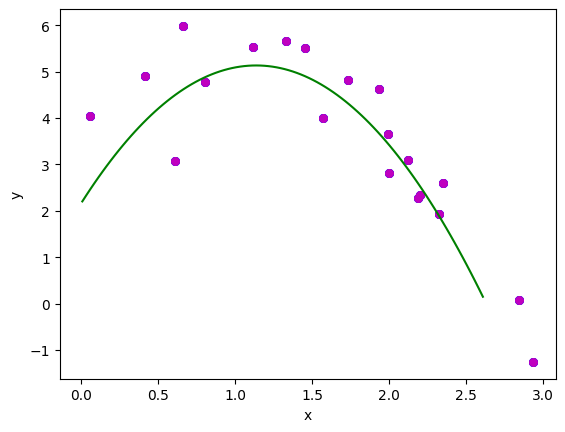

Average error on the testing set:  0.7573635655517964
2nd-order polynomial regression is a better fit than linear regression.


In [ ]:
"""
# Test 2nd-order regression model on testing set
"""
test_features_vals = test_features.values
test_desired_outputs_vals = test_desired_outputs.values

plt.scatter(test_features_vals, test_desired_outputs, color = 'b', marker = 'o', s = 30)

y_pred = []
def plot_regression_line(x, y, b): 
    # Plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 30) 

    x_line = np.linspace(train_features_vals.min(), train_features_vals.max(), 100)
    global y_pred
    y_pred = b[2]*np.square(x_line) + b[1]*x_line + b[0] 
    regression_line = y_pred
    # Plotting the regression line 
    plt.plot(x_line, regression_line, color = "g") 

    # Putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 

plt.scatter(test_features_vals, test_desired_outputs, color = 'b', marker = 'o', s = 30)
plot_regression_line(test_features_vals, test_desired_outputs_vals, result)
plt.show() 

# Find average error on the training set
A = np.square(result[2]*np.square(test_features_vals) + result[1]*test_features_vals + result[0]  - test_desired_outputs_vals)
error = np.sum(A)/test_features_vals.shape[0]
print('Average error on the testing set: ', error)
print('2nd-order polynomial regression is a better fit than linear regression.')


When comparing the MSE’s of our linear regression model and 2nd-order polynomial regression model, we see that the latter fit the testing set better than former. Hooray! We were able to improve the accuracy of our model by increasing the complexity. Be warned, however, that increasing model complexity doesn’t always lead to better accuracy.

In order to extend this model further, try implementing a 3rd-order polynomial regression by adding in a cubed term for the feature x in the design matrix X, like this:

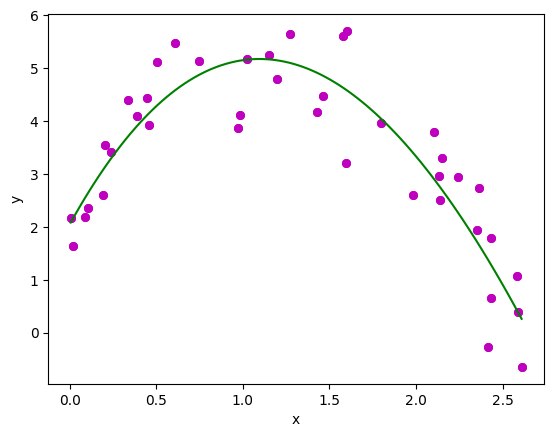

Average error on the training set:  0.4805521334453259


In [ ]:
"""
# Train 3rd-order regression model on training set
"""
train_features_vals = train_features.values
train_desired_outputs_vals = train_desired_outputs.values

# Plot scatter plot
plt.scatter(train_features_vals, train_desired_outputs_vals, color = 'm', marker = 'o', s = 30)

N = len(train_features)
X = np.c_[np.ones(N), train_features_vals, np.square(train_features), np.power(train_features, 3)]
A = np.linalg.inv(X.T@X)
D = A@X.T
result = D@train_desired_outputs_vals

y_pred = []
def plot_regression_line(x, y, b): 
    # Plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 30) 

    x_line = np.linspace(train_features_vals.min(), train_features_vals.max(), 100)
    global y_pred
    y_pred = b[3]*np.power(x_line, 3) + b[2]*np.square(x_line) + b[1]*x_line + b[0]     
    regression_line = y_pred
    # Plotting the regression line 
    plt.plot(x_line, regression_line, color = "g") 

    # Putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 

plot_regression_line(train_features_vals, train_desired_outputs_vals, result)
plt.show() 

# Find average error on the training set
A = np.square(result[3]*np.power(train_features_vals, 3) + result[2]*np.square(train_features_vals) + result[1]*train_features_vals + result[0]  - train_desired_outputs_vals)
error = np.sum(A)/N
print('Average error on the training set: ', error)

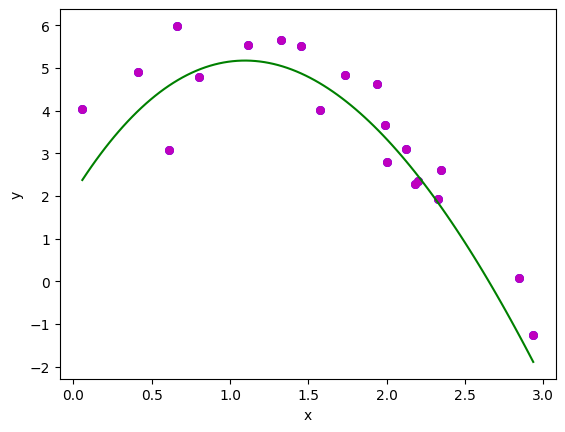

Average error on the testing set:  0.691124536288844
3rd-order polynomial regression is a better fit than 2nd-order polynomial regression.


In [ ]:
"""
# Test 3rd-order regression model on testing set
"""
test_features_vals = test_features.values
test_desired_outputs_vals = test_desired_outputs.values

plt.scatter(test_features_vals, test_desired_outputs, color = 'b', marker = 'o', s = 30)

y_pred = []
def plot_regression_line(x, y, b): 
    # Plotting the actual points as scatter plot 
    plt.scatter(x, y, color = "m", 
            marker = "o", s = 30) 

    x_line = np.linspace(test_features_vals.min(), test_features_vals.max(), 100)
    global y_pred
    y_pred = b[3]*np.power(x_line, 3) + b[2]*np.square(x_line) + b[1]*x_line + b[0] 
    regression_line = y_pred
    # Plotting the regression line 
    plt.plot(x_line, regression_line, color = "g") 
    # Putting labels 
    plt.xlabel('x') 
    plt.ylabel('y') 

plot_regression_line(test_features_vals, test_desired_outputs_vals, result)
plt.show() 

# Find average error on the training set
A = np.square(result[3]*np.power(test_features_vals, 3) + result[2]*np.square(test_features_vals) + result[1]*test_features_vals + result[0]  - test_desired_outputs_vals)
error = np.sum(A)/test_features_vals.shape[0]
print('Average error on the testing set: ', error)
print('3rd-order polynomial regression is a better fit than 2nd-order polynomial regression.')


References:
https://towardsdatascience.com/implementing-linear-and-polynomial-regression-from-scratch-f1e3d422e6b4
https://towardsdatascience.com/machine-learning-polynomial-regression-with-python-5328e4e8a386

Linear and Polynomial Regression by Bhawneet Singh is licensed under [CC BY NC SA 4.0](https://creativecommons.org/licenses/by-nc-sa/4.0/).